**BREAST CANCER PREDICTION**

This project aims to predict whether the cancer is benign or malignant


/kaggle/input/breast-cancer-wisconsin-data/data.csv

#Libraries

In [ ]:
# Standard Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning models and related utilities
from sklearn import model_selection
from sklearn.model_selection import train_test_split, KFold, cross_val_score, RandomizedSearchCV, GridSearchCV, RepeatedStratifiedKFold, StratifiedKFold
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler
from matplotlib.pylab import rcParams
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Remove warnings
import warnings
warnings.filterwarnings('ignore')


data = pd.read_csv("Diagnostico de cancer de mama/data.csv", sep=',', encoding='utf-8')

# Exploraty Data Analysis

## Dataset

In [ ]:
data.head() #primeiras 5 linhas

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

**Observations**:

1) Id - The feature ID cannot be used for classification

2)  Unnamed: 32 - Feature includes NaN so we do not need it

3) Diagnosis - It is binary categorical variable, so we can change to a Boolean model, leaving it in integer format



In [ ]:
data1 = data.drop(columns=['id', 'Unnamed: 32'])

In [ ]:
data1['diagnosis'] = data['diagnosis'].map({'B':0, 'M':1})

In [ ]:
data1.isnull().sum().sum()

0

In [ ]:
data1.duplicated().sum()

0

In [ ]:
data1.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
data1.describe().T

,count,mean,std,min,25%,50%,75%,max
diagnosis,569.0,0.372583,0.483918,0.000000,0.000000,0.000000,1.000000,1.00000
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400


In [ ]:
y = data1.diagnosis

In [ ]:
x = data1.drop(columns=['diagnosis'])


##Train and Test

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)
print(f'Train dataset = {x_train.shape} Train target = {y_train.shape}.')
print(f'Test dataset = {x_test.shape} Test target = {y_test.shape}.')

Train dataset = (398, 30) Train target = (398,).
Test dataset = (171, 30) Test target = (171,).


In [ ]:
# To facilitate the code, let’s join x_train and y_train in the same dataframe:
data_train = pd.concat([x_train,y_train], axis = 1)

## Boxplot

For an overview of data, we will plot real data (not normalized/standardized)
in boxplots.
Therefore, in order to create a boxplots of similar scales, we will analyze the maximum, minimum, median and mean of each variable.


In [ ]:
variables= list(range(0, 30))
max=x.max()
min=x.min()
median=x.median()
mean=x.mean()

In [ ]:
df = pd.DataFrame({'Variable': variables,'Max':max, 'Min':min, 'Median': median, 'Mean':mean })
df.sort_values(by=['Max'])

,Variable,Max,Min,Median,Mean
fractal_dimension_se,19,0.02984,0.000895,0.003187,0.003795
smoothness_se,14,0.03113,0.001713,0.006380,0.007041
concave points_se,17,0.05279,0.000000,0.010930,0.011796
symmetry_se,18,0.07895,0.007882,0.018730,0.020542
fractal_dimension_mean,9,0.09744,0.049960,0.061540,0.062798
compactness_se,15,0.13540,0.002252,0.020450,0.025478
smoothness_mean,4,0.16340,0.052630,0.095870,0.096360
concave points_mean,7,0.20120,0.000000,0.033500,0.048919
fractal_dimension_worst,29,0.20750,0.055040,0.080040,0.083946
smoothness_worst,24,0.22260,0.071170,0.131300,0.132369


According to the table above, the variables were divided into 7 groups for a better visualization of boxplot

In [ ]:
datac1=pd.concat([y,x.iloc[:,[19,14,17,18]]],axis=1)

In [ ]:
datamelt1 = pd.melt(datac1,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')

(array([0, 1, 2, 3]),
 [Text(0, 0, 'fractal_dimension_se'),
  Text(1, 0, 'smoothness_se'),
  Text(2, 0, 'concave points_se'),
  Text(3, 0, 'symmetry_se')])

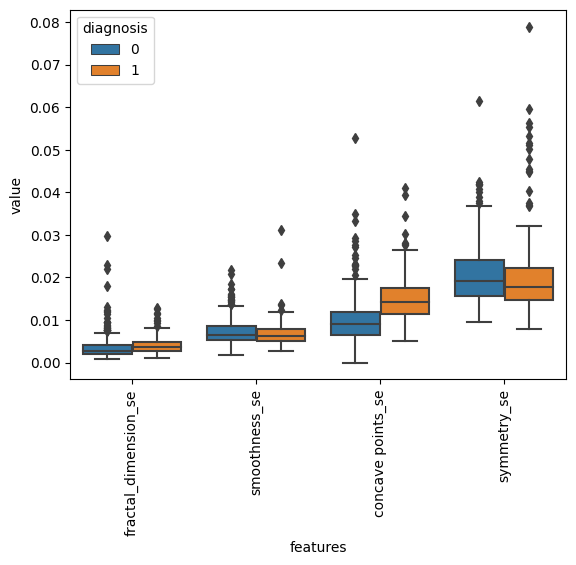

In [ ]:
sns.boxplot(x="features", y="value", hue="diagnosis", data=datamelt1)
plt.xticks(rotation=90)

In [ ]:
datac2=pd.concat([y,x.iloc[:,[9, 15,4,7,29,24,27,8]]],axis=1)

In [ ]:
datamelt2= pd.melt(datac2,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'fractal_dimension_mean'),
  Text(1, 0, 'compactness_se'),
  Text(2, 0, 'smoothness_mean'),
  Text(3, 0, 'concave points_mean'),
  Text(4, 0, 'fractal_dimension_worst'),
  Text(5, 0, 'smoothness_worst'),
  Text(6, 0, 'concave points_worst'),
  Text(7, 0, 'symmetry_mean')])

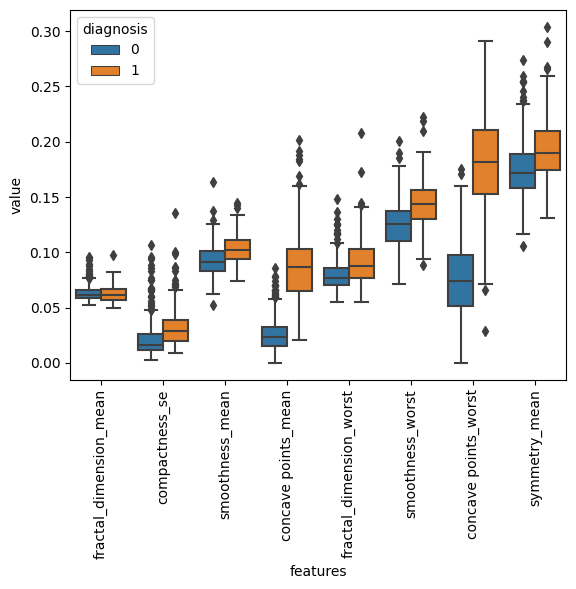

In [ ]:
sns.boxplot(x="features", y="value", hue="diagnosis", data=datamelt2)
plt.xticks(rotation=90)

In [ ]:
datac3=pd.concat([y,x.iloc[:,[5,16,6,28]]],axis=1)

In [ ]:
datamelt3= pd.melt(datac3,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')

(array([0, 1, 2, 3]),
 [Text(0, 0, 'compactness_mean'),
  Text(1, 0, 'concavity_se'),
  Text(2, 0, 'concavity_mean'),
  Text(3, 0, 'symmetry_worst')])

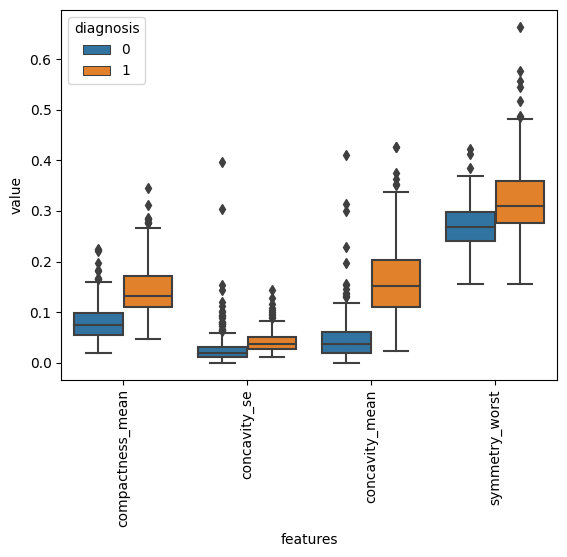

In [ ]:
sns.boxplot(x="features", y="value", hue="diagnosis", data=datamelt3)
plt.xticks(rotation=90)

In [ ]:
datac4=pd.concat([y,x.iloc[:,[25, 26, 10, 11]]],axis=1)

In [ ]:
datamelt4 = pd.melt(datac4,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')

(array([0, 1, 2, 3]),
 [Text(0, 0, 'compactness_worst'),
  Text(1, 0, 'concavity_worst'),
  Text(2, 0, 'radius_se'),
  Text(3, 0, 'texture_se')])

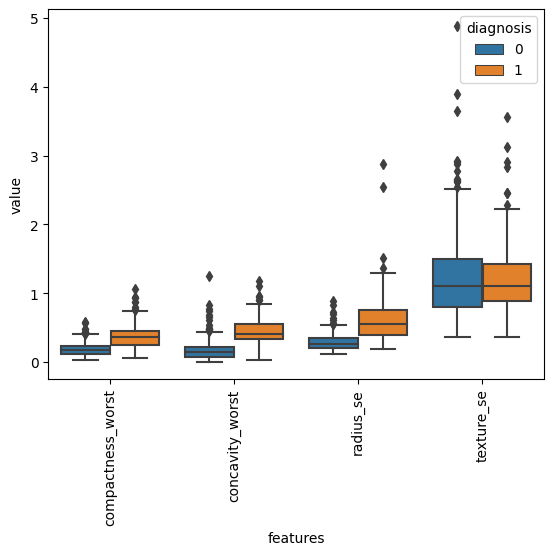

In [ ]:
sns.boxplot(x="features", y="value", hue="diagnosis", data=datamelt4)
plt.xticks(rotation=90)

In [ ]:
datac5=pd.concat([y,x.iloc[:,[12, 0, 20, 1, 21,]]],axis=1)

In [ ]:
datamelt5 = pd.melt(datac5,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'perimeter_se'),
  Text(1, 0, 'radius_mean'),
  Text(2, 0, 'radius_worst'),
  Text(3, 0, 'texture_mean'),
  Text(4, 0, 'texture_worst')])

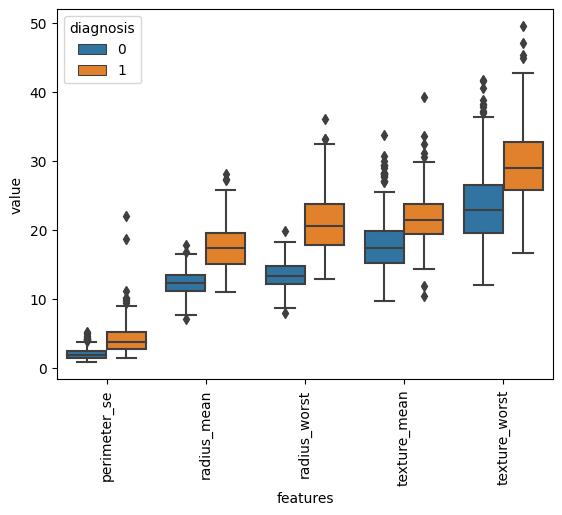

In [ ]:
sns.boxplot(x="features", y="value", hue="diagnosis", data=datamelt5)
plt.xticks(rotation=90)

In [ ]:
datac6=pd.concat([y,x.iloc[:,[2, 22, 13]]],axis=1)

In [ ]:
datamelt6 = pd.melt(datac6,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')

(array([0, 1, 2]),
 [Text(0, 0, 'perimeter_mean'),
  Text(1, 0, 'perimeter_worst'),
  Text(2, 0, 'area_se')])

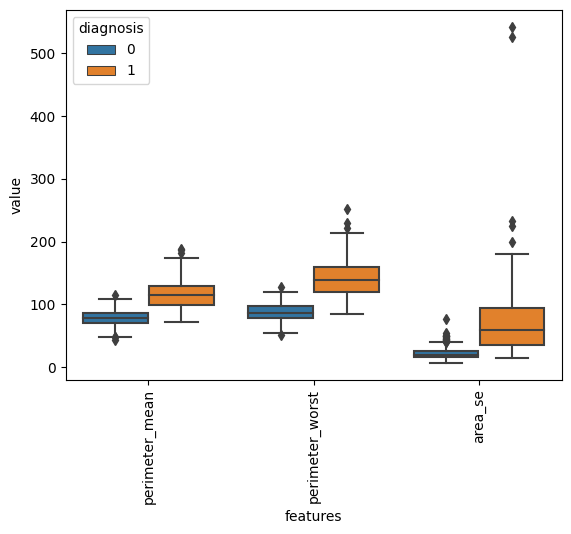

In [ ]:
sns.boxplot(x="features", y="value", hue="diagnosis", data=datamelt6)
plt.xticks(rotation=90)

In [ ]:
datac7=pd.concat([y,x.iloc[:,[3,23]]],axis=1)

In [ ]:
datamelt7 = pd.melt(datac7,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')

(array([0, 1]), [Text(0, 0, 'area_mean'), Text(1, 0, 'area_worst')])

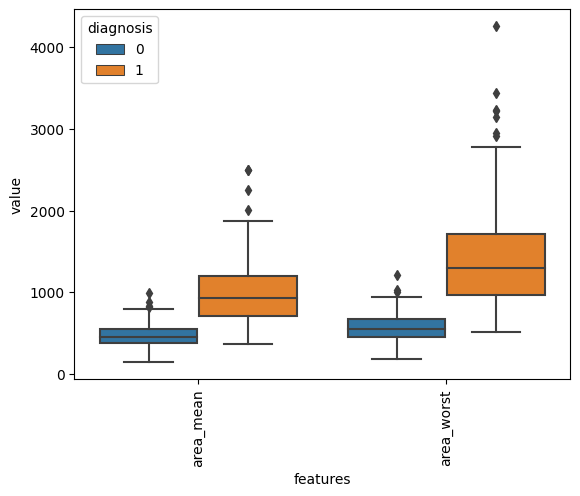

In [ ]:
sns.boxplot(x="features", y="value", hue="diagnosis", data=datamelt7)
plt.xticks(rotation=90)

**Analysis**

A)
**Smoothness_se, texture_se, fractal_dimension_mean** - These characteristics present benign and malignant data very similar, with almost equal medians.

**Symmetry_se** - Only Feature with a median of benign greater than malignant.

**The remaining Features** - Showed a malignant median greater than benign, a correlation of larger values with malignant tumors, which tends to be good for classification models.

B)
**Fractal_dimension_se,concavity_se, perimeter_se, area_se** - Features with outliers more discrepant.

# Evaluation of Machine Learning Algorithms

###Build Models

In [ ]:
# prepare models
models = []
models.append(('LR', LogisticRegression(random_state=0)))
models.append(('SVC', SVC(random_state=0)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DTC', DecisionTreeClassifier(random_state=0)))
models.append(('XGB', XGBClassifier(random_state=0)))
models.append(('LGBM', LGBMClassifier(random_state=0,verbose=-1)))
# evaluate each model in turn
results1 = []
names = []
for name, model in models:
 kfold = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
 cv_results1 = model_selection.cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
 results1.append(cv_results1)
 names.append(name)
 msg = "%s: %f (%f)" % (name, cv_results1.mean(), cv_results1.std())
 print(msg)

LR: 0.936261 (0.028195)
SVC: 0.901068 (0.037608)
KNN: 0.917821 (0.040328)
DTC: 0.920491 (0.035896)
XGB: 0.958120 (0.029209)
LGBM: 0.961410 (0.032367)


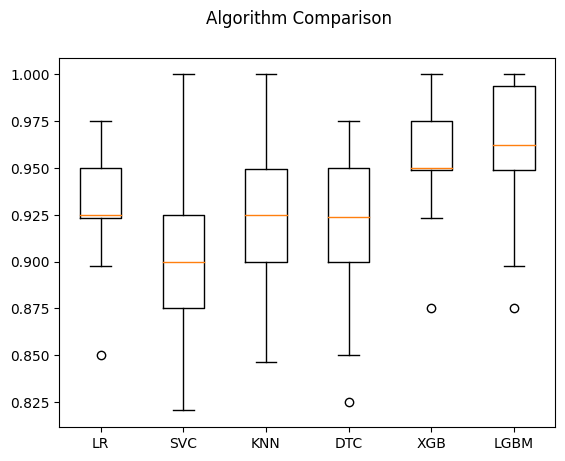

In [ ]:
# Boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results1)
ax.set_xticklabels(names)
plt.show()

From these results, we can see that it looks like **LightGBM** has the **largest** estimated accuracy score at about 0.9614 or **96,14%**

###Build Models scaled

In [ ]:
pipelines = []
pipelines.append(('LR_scaled' , (Pipeline([('scaled' , StandardScaler()),('LR',LogisticRegression(random_state=0))]))))
pipelines.append(('SVC_scaled' , (Pipeline([('scaled' , StandardScaler()),('SVC',SVC(random_state=0))]))))
pipelines.append(('KNN_scaled' , (Pipeline([('scaled' , StandardScaler()),('KNN',KNeighborsClassifier())]))))
pipelines.append(('DT_scaled' , (Pipeline([('scaled' , StandardScaler()),('DT',DecisionTreeClassifier(random_state=0))]))))
pipelines.append(('XGB_scaled' , (Pipeline([('scaled' , StandardScaler()),('XGB', XGBClassifier(random_state=0))]))))
pipelines.append(('LGB_scaled' , (Pipeline([('scaled' , StandardScaler()),('LGB', LGBMClassifier(random_state=0,verbose=-1))]))))

model_name = []
results2 = []
for pipe ,model in pipelines:
    kfold = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    crossv_results2 = cross_val_score(model , x_train ,y_train ,cv =kfold , scoring='accuracy')
    results2.append(crossv_results2)
    model_name.append(pipe)
    msg = "%s: %f (%f)" % (model_name, crossv_results2.mean(), crossv_results2.std())
    print(msg)

In [ ]:
# Boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results2)
ax.set_xticklabels(model_name)
plt.show()


From these results, we can see that after scaling the **Regression Logistic** model had increased estimated accuracy score from 93,62 to **98,32**, thus becoming the **best performance model**.

### Algorithm comparison (Mean)

In [ ]:
x = np.arange(6)
z1 = [93.62, 90.11, 91.78, 92.05, 95.81, 96.14]
z2 = [98.32, 97.65, 96.31, 92.05, 95.81, 96.48]
width = 0.40
plt.bar(x-0.2, z1, width,color='gray')
plt.bar(x+0.2, z2, width,color='blue')
plt.ylim(85, 100)
plt.xticks(x, ['LR', 'SVC', 'KNN','DT', 'XGB', 'LGBM'] )
plt.legend(["No Scaled", "Scaled"])
plt.title('Algorithm Comparison - (Mean)')
plt.show()



 As expected, Tree-Based Algorithms were fairly insensitive to the scale of the features, unlike the other algorithms.

 . **Gradient Descent Based Algorithms** like **LR**, require data to be scaled.
  The difference in the ranges of features will cause different step sizes for each feature. To ensure that the gradient descent moves smoothly towards the minima and that the steps for gradient descent are updated at the same rate for all the features, we scale the data before feeding it to the model.

 . **Distance-Based Algorithms** like **KNN, SVC**,  are most affected by the range of features. This is because, behind the scenes, they are using distances between data points to determine their similarity.
Therefore, we scale our data before employing a distance based algorithm so that all the features contribute equally to the result.

**Tree-Based Algorithms** like **DT, XGB,LGBM**, are fairly insensitive to the scale of the features. A decision tree only splits a node based on a single feature. The decision tree splits a node on a feature that increases the homogeneity of the node. Other features do not influence this split on a feature. So, the remaining features have virtually no effect on the split. This is what makes them invariant to the scale of the features!

#Selected models

##Logistic Regression - Scaled

###Hyperparameter tuning

In [ ]:
pip install scikit-optimize

In [ ]:
from skopt import BayesSearchCV

In [ ]:
# build a pipeline with two steps, the scaler and the LogisticRegression
pipe=Pipeline([('scalar1',StandardScaler()),
              ('classifier',LogisticRegression(random_state=0))])
# define evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define search space
space = [
                {"classifier__penalty": ['l2','l1'],
                 "classifier__solver":['saga','liblinear'],
                 "classifier__C": [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100],
                 "classifier__max_iter":[100, 1000,2500, 5000]},
                 {"classifier__penalty": ['l2','none'],
                 "classifier__solver":['newton-cg','newton-cholesky','sag','lbfgs'],
                 "classifier__C": [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100],
                 "classifier__max_iter":[100, 1000,2500, 5000]
                 }]
# define search
Bayes = BayesSearchCV(pipe, space, scoring='accuracy', n_jobs=-1, cv=cv)
# execute search
result = Bayes.fit(x_train, y_train)

In [ ]:
# summarize result
print("Best Score:%.4f" % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

In [ ]:
means = result.cv_results_['mean_test_score']
stds = result.cv_results_['std_test_score']
params = result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

###Make Predictions

In [ ]:
# Make predictions on validation dataset
model = result.best_estimator_
predictions = model.predict(x_test)
y_pred = model.predict_proba(x_test)[:, 1]

# Evaluate predictions
print ("Accuracy: %.2f%%" % (accuracy_score(y_test, predictions)* 100.0))
print("ROC AUC:: %.2f%%" % (roc_auc_score(y_test, y_pred) * 100.0))

##LightGBM

###Hyperparameter tuning

In [ ]:
!pip install lightgbm

In [ ]:
from lightgbm import LGBMClassifier
from skopt import BayesSearchCV

In [ ]:
# define model
lgbm = LGBMClassifier(random_state=0, subsample_freq=1,
                         n_estimators=100,verbose=-1)
# define evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define search space
space = {'learning_rate': (1e-3, 1e-1, "log-uniform"),
         'num_leaves':(2, 130),
         'min_child_samples': (1, 100),
         'subsample': (0.05, 1.0),
         'colsample_bytree':(0.1, 1.0)}
         # define search
BayesL = BayesSearchCV(lgbm, space, scoring='accuracy', n_jobs=-1, cv=cv)
# execute search
resultL = BayesL.fit(x_train, y_train)

In [ ]:
# summarize result
print("Best Score:%.4f" % resultL.best_score_)
print('Best Hyperparameters: %s' % resultL.best_params_)

In [ ]:
means = resultL.cv_results_['mean_test_score']
stds = resultL.cv_results_['std_test_score']
params = resultL.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

###Make Predictions

In [ ]:
# Make predictions on validation dataset
predict = BayesL.predict(x_test)
y_predict = BayesL.predict_proba(x_test)[:, 1]

# Evaluate predictions
print("Accuracy: %.2f%%" % (accuracy_score(y_test, predict) * 100.0))
print("ROC AUC:: %.2f%%" % (roc_auc_score(y_test, y_predict) * 100.0))

# MACHINE LEARNING ALGORITHMS

###PREPROCESSING DATA

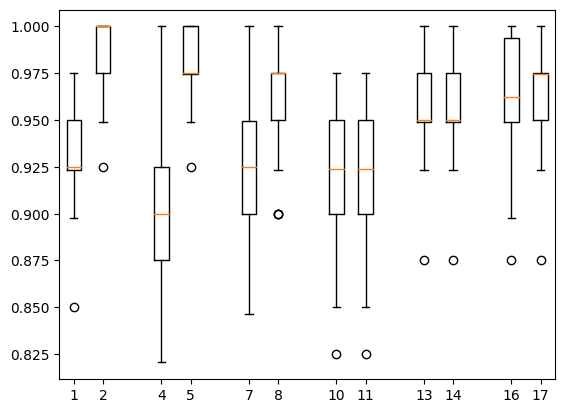

In [ ]:
# Boxplot algorithm comparison
fig = plt.figure()
ax.set_title('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results1, positions=[1,4,7,10,13,16])
plt.boxplot(results2, positions=[2,5,8,11,14,17])
plt.show()

###Dimensionality Reduction


Principal Component Analysis (PCA)

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=5)

In [ ]:
predictive_pca = pca.fit_transform(x)

In [ ]:
predictive_pca.shape

(569, 5)

In [ ]:
# Principal Components
predictive_pca

array([[ 1.16014257e+03, -2.93917544e+02,  4.85783976e+01,
        -8.71197531e+00,  3.20004861e+01],
       [ 1.26912244e+03,  1.56301818e+01, -3.53945342e+01,
         1.78612832e+01, -4.33487404e+00],
       [ 9.95793889e+02,  3.91567432e+01, -1.70975298e+00,
         4.19934010e+00, -4.66529118e-01],
       ...,
       [ 3.14501756e+02,  4.75535252e+01, -1.04424072e+01,
        -9.77188104e+00, -6.15621283e+00],
       [ 1.12485812e+03,  3.41292250e+01, -1.97420874e+01,
        -2.36608814e+01,  3.56513324e+00],
       [-7.71527622e+02, -8.86431064e+01,  2.38890319e+01,
         2.54724855e+00, -1.47175663e+01]])

In [ ]:
# Explained variance ratio
pca.explained_variance_ratio_

array([9.82044672e-01, 1.61764899e-02, 1.55751075e-03, 1.20931964e-04,
       8.82724536e-05])

In [ ]:
# Explained variance ratio sum
pca.explained_variance_ratio_.sum()

0.9999878765363129

###Preprocessing summary

predictive_scales = Set of scaled variables

predictive_pca = Set of variables with dimensionality reduction.

Naive Bayes = 92,4% e 93,82% (Cross validation) : predict

SVM = 96,49% e 94,88% (Cross validation) : predict - SVC(kernel='linear', random_state=1, C = 5)

LogisticRegression = 98,25% e 98,06% (Cross validation) : predict_scales - LLogisticRegression(random_state=1, max_iter=400, penalty="l2",
                               tol=0.0001, C=1,solver="liblinear")

KNN = 96,49% e 93,66% (Cross validation) : predict - KNeighborsClassifier(n_neighbors=5, metric='minkowski', p = 1)

DecisionTree = 95,32% e 93.67% (Cross validation) : predict - DecisionTreeClassifier(criterion='entropy', random_state = 0, max_depth=3)

Random Forest = 96,49% e 95,76% (Cross validation) : predict - RandomForestClassifier(n_estimators=150, criterion='entropy', random_state = 0, max_depth=4)

XGBoost = 98,25% e 97,16% (Cross validation) : predict - XGBClassifier(max_depth=5, learning_rate=0.1, n_estimators=150, objective='binary:logistic', random_state=3)

LightGBM = 98,25% e 96,29% (Cross validation) : predict - lgb.LGBMClassifier(num_leaves = 100, objective = 'binary',     
                            max_depth = 2, learning_rate = .05, max_bin =150)

From these results, we can see that it looks like **Logistic Regression -LR** has the **largest** estimated accuracy score at about 0.9648 or **98,32%**.

### Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
naive = GaussianNB()
naive.fit(x_train, y_train)

GaussianNB()

In [ ]:
predict_naive = naive.predict(x_test)
predict_naive

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0])

In [ ]:
y_test

512    1
457    0
439    0
298    0
37     0
      ..
7      1
408    1
523    0
361    0
553    0
Name: diagnosis, Length: 171, dtype: int64

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
print("Accuracy: %.2f%%" % (accuracy_score(y_test, predict_naive) * 100.0))

Accuracy: 92.40%


In [ ]:
confusion_matrix(y_test, predict_naive)

array([[101,   7],
       [  6,  57]])

In [ ]:
print(classification_report(y_test, predict_naive))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       108
           1       0.89      0.90      0.90        63

    accuracy                           0.92       171
   macro avg       0.92      0.92      0.92       171
weighted avg       0.92      0.92      0.92       171



**Analysis of training data**

In [ ]:
predict_train_nb = naive.predict(x_train)
predict_train_nb

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,

In [ ]:
print("Accuracy: %.2f%%" % (accuracy_score(y_train, predict_train_nb) * 100.0))

Accuracy: 94.22%


In [ ]:
confusion_matrix(y_train, predict_train_nb)

array([[242,   7],
       [ 16, 133]])

Results

predictive = Accuracy:Test=92,40/Train=94,22

predictive_scales = Accuracy:Test=91,23/Train=94,22

predictive_pca = Accuracy:Test=92,98/Train=90,45


**Cross validation**

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
kfold = KFold(n_splits = 30, shuffle=True, random_state = 5)

In [ ]:
model = GaussianNB()
result = cross_val_score(model, predictive, target, cv = kfold)
result

array([0.89473684, 0.89473684, 1.        , 0.94736842, 1.        ,
       0.94736842, 0.94736842, 1.        , 0.94736842, 1.        ,
       1.        , 0.94736842, 0.94736842, 0.94736842, 0.94736842,
       1.        , 0.84210526, 0.89473684, 1.        , 0.94736842,
       0.89473684, 0.78947368, 0.89473684, 1.        , 0.94736842,
       1.        , 0.94736842, 0.94736842, 0.89473684, 0.77777778])

In [ ]:
print("Mean Accuracy: %.2f%%" % (result.mean() * 100.0))

Mean Accuracy: 93.82%


### Support Vector Classification - SVC

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm = SVC(kernel='linear', random_state=1, C = 5)
svm.fit(x_train, y_train)

SVC(C=5, kernel='linear', random_state=1)

In [ ]:
predict_svm = svm.predict(x_test)
predict_svm

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0])

In [ ]:
y_test

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
print("Accuracy: %.2f%%" % (accuracy_score(y_test, predict_svm) * 100.0))

Accuracy: 96.49%


In [ ]:
confusion_matrix(y_test, predict_svm)

array([[103,   5],
       [  1,  62]])

In [ ]:
print(classification_report(y_test, predict_svm))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95       108
           1       0.87      0.97      0.92        63

    accuracy                           0.94       171
   macro avg       0.93      0.94      0.93       171
weighted avg       0.94      0.94      0.94       171



Analysis of training data

In [ ]:
predict_train_svm = svm.predict(x_train)
predict_train_svm

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,

In [ ]:
print("Accuracy: %.2f%%" % (accuracy_score(y_train, predict_train_svm) * 100.0))

Accuracy: 96.48%


In [ ]:
confusion_matrix(y_train, predict_train_svm)

array([[245,   4],
       [ 10, 139]])

Results

predictive = Accuracy:Test=96,49/Train=96,48

predictive_scales = Accuracy:Test=94,74/Train=98,99

predictive_pca = Accuracy:Test=93,57/Train=95,73

**Cross validation**

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
kfold = KFold(n_splits = 30, shuffle=True, random_state = 5)

In [ ]:
model = SVC(kernel='linear', random_state=1, C = 5)
result = cross_val_score(model, predictive, target, cv = kfold)
result

array([1.        , 0.89473684, 1.        , 0.94736842, 1.        ,
       0.94736842, 0.94736842, 0.94736842, 1.        , 1.        ,
       1.        , 0.94736842, 0.94736842, 1.        , 0.89473684,
       1.        , 0.84210526, 0.94736842, 1.        , 1.        ,
       0.84210526, 0.84210526, 1.        , 0.94736842, 0.94736842,
       0.94736842, 1.        , 1.        , 0.84210526, 0.83333333])

In [ ]:
print("Mean Accuracy: %.2f%%" % (result.mean() * 100.0))

Mean Accuracy: 94.88%


### Logistic Regression

**Results**

***Simples***- 94,22 - 95,32

***Random Search***  - 96,31 - 94,74

***Grid Search*** - 96,31 - 94,74


predictive = Accuracy:Test=96,49/Train=95,73

predictive_scales = Accuracy:Test=98,25/Train=98,99

predictive_pca = Accuracy:Test=94,15/Train=95,48

In [ ]:
from scipy.stats import loguniform

**Reg simple**

In [ ]:
# define model
logistics = LogisticRegression(random_state=1)
# execute search
logistics.fit(x_train, y_train)

LogisticRegression(random_state=1)

In [ ]:
print("Accuracy: %.2f" %(logistics.score(x_train, y_train)*100))

Accuracy: 94.22


In [ ]:
print("Accuracy: %.2f" %(logistics.score(x_test, y_test)*100))

Accuracy: 95.32


**Grid Search**

In [ ]:
from sklearn.model_selection import GridSearchCV
# define model
logistic = LogisticRegression()
# define evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define search space
space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
space['C'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]
# define search
searchg = GridSearchCV(logistic, space, scoring='accuracy', n_jobs=-1, cv=cv)
# execute search
resultg = searchg.fit(x_train, y_train)
# summarize result
print('Best Score: %s' % resultg.best_score_)
print('Best Hyperparameters: %s' % resultg.best_params_)

Best Score: 0.9631196581196584
Best Hyperparameters: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}


In [ ]:
logisticg = LogisticRegression(random_state=1, C=100, penalty="l1", solver="liblinear")
logisticg.fit(x_train, y_train)

LogisticRegression(C=100, penalty='l1', random_state=1, solver='liblinear')

In [ ]:
print("Accuracy: %.2f" %(logisticg.score(x_test, y_test)*100))

Accuracy: 94.74


**Random Search**

In [ ]:
# define model
logistic = LogisticRegression()
# define evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define search space
space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
space['C'] = loguniform(1e-5, 100)
# define search
searchr = RandomizedSearchCV(logistic, space, n_iter=500, scoring='accuracy', n_jobs=-1, cv=cv, random_state=1)
# execute search
resultr = searchr.fit(x_train, y_train)
# summarize result
print('Best Score: %s' % resultr.best_score_)
print('Best Hyperparameters: %s' % resultr.best_params_)

Best Score: 0.9656623931623933
Best Hyperparameters: {'C': 68.7565446593523, 'penalty': 'l1', 'solver': 'liblinear'}


In [ ]:
logisticr = LogisticRegression(random_state=1, C=68.76, penalty="l1", solver="liblinear")
logisticr.fit(x_train, y_train)

LogisticRegression(C=68.76, penalty='l1', random_state=1, solver='liblinear')

In [ ]:
print("Accuracy: ","%.2f" %(logisticr.score(x_test, y_test)*100))

Accuracy:  94.74


### Logistic Regression - scaler

**Scaled**

***Simples***- 98,99 - 97,66

***Grid Search*** - (C=1, penalty="l2", solver="liblinear") - 98,32 - 96,49

***Random Search*** - (C=0.79, penalty="l2", solver="liblinear") - 98,32 - 96,49


In [ ]:
from sklearn.linear_model import LogisticRegression
# build a pipeline with two steps, the scaler and the LogisticRegression
pipes = make_pipeline(StandardScaler(),  LogisticRegression(random_state=1))
# fit both steps on the training data:
pipes.fit(x_train, y_train)
# score the test dataset:
print("Accuracy with scaling (train): ","%.2f" %( pipes.score(x_train, y_train)*100))
print("Accuracy with scaling (test):","%.2f" %( pipes.score(x_test, y_test)*100))

Accuracy with scaling (train):  98.99
Accuracy with scaling (test): 97.66


**Grid Search**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
# build a pipeline with two steps, the scaler and the LogisticRegression
pipe=Pipeline([('scalar1',StandardScaler()),
              ('classifier',LogisticRegression(random_state=1))])
# define search space
space =[
                {"classifier": [LogisticRegression()],
                 "classifier__penalty": ['l2','l1'],
                 "classifier__solver":['saga','liblinear'],
                 "classifier__C": [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]
                 },
                {"classifier": [LogisticRegression()],
                 "classifier__penalty": ['l2'],
                 "classifier__solver":['newton-cg','saga','sag','liblinear','lbfgs'],
                 "classifier__C": [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]}]
# define evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define search
searchG = GridSearchCV(pipe, space, scoring="accuracy", cv=cv, n_jobs=4,)
# The gridsearch object can be fitted to the data.
resultG=searchG.fit(x_train, y_train)
print('Best Score: %s' % resultG.best_score_)
print('Best Hyperparameters: %s' % resultG.best_params_)

Best Score: 0.9832051282051283
Best Hyperparameters: {'classifier': LogisticRegression(C=1, solver='liblinear'), 'classifier__C': 1, 'classifier__penalty': 'l2', 'classifier__solver': 'liblinear'}


In [ ]:
logisticG = LogisticRegression(random_state=1, C=1, penalty="l2", solver="liblinear")
logisticG.fit(x_train, y_train)
print("Accuracy test: ","%.2f" %(logisticG.score(x_test, y_test)*100))

Accuracy test:  96.49


Best Score: 0.9832051282051283
Best Hyperparameters: {'classifier': LogisticRegression(C=1, solver='liblinear'), 'classifier__C': 1, 'classifier__penalty': 'l2', 'classifier__solver': 'liblinear'}

**Random Search**

In [ ]:
# build a pipeline with two steps, the scaler and the LogisticRegression
pipe=Pipeline([('scalar1',StandardScaler()),
              ('classifier',LogisticRegression(random_state=1))])
# define search space
space =[
                {"classifier": [LogisticRegression()],
                 "classifier__penalty": ['l2','l1'],
                 "classifier__solver":['saga','liblinear'],
                 "classifier__C": loguniform(1e-5, 100)
                 },
                {"classifier": [LogisticRegression()],
                 "classifier__penalty": ['l2'],
                 "classifier__solver":['newton-cg','saga','sag','liblinear','lbfgs'],
                 "classifier__C": loguniform(1e-5, 100)}]
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define search
searchR = RandomizedSearchCV(pipe, space, n_iter=500, scoring='accuracy', n_jobs=-1, cv=cv, random_state=1)
# execute search
resultR = searchR.fit(x_train, y_train)
print('Best Score: %s' % resultR.best_score_)
print('Best Hyperparameters: %s' % resultR.best_params_)

Best Score: 0.9832051282051283
Best Hyperparameters: {'classifier': LogisticRegression(C=0.7912405208253016, solver='liblinear'), 'classifier__C': 0.7912405208253016, 'classifier__penalty': 'l2', 'classifier__solver': 'liblinear'}


In [ ]:
logisticR = LogisticRegression(random_state=1, C= 0.79, penalty="l2", solver="liblinear")
logisticR.fit(x_train, y_train)
print("Accuracy test: ","%.2f" %(logisticR.score(x_test, y_test)*100))

Accuracy test:  96.49


Different parameters

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
# build a pipeline with two steps, the scaler and the LogisticRegression
pipe1=Pipeline([('scalar1',StandardScaler()),
              ('classifier',LogisticRegression(random_state=1))])
# define search space
space =[
                {"classifier": [LogisticRegression()],
                 "classifier__penalty": ['none', 'l1', 'l2', 'elasticnet'],
                 "classifier__solver":['newton-cg','saga','sag','liblinear','lbfgs'],
                 "classifier__C": [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]}]
# define evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define search
search = GridSearchCV(pipe1, space, scoring="accuracy", cv=cv, n_jobs=4,)
# The gridsearch object can be fitted to the data.
result=search.fit(x_train, y_train)
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.9832051282051283
Best Hyperparameters: {'classifier': LogisticRegression(C=1, solver='newton-cg'), 'classifier__C': 1, 'classifier__penalty': 'l2', 'classifier__solver': 'newton-cg'}


### K Nearest Neighbors (KNN)

In [ ]:
#Importing the GridSearchCV for Cross Validation
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=1)
knn.fit(x_train, y_train)

KNeighborsClassifier(p=1)

In [ ]:
predict_knn = knn.predict(x_test)
predict_knn

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0])

In [ ]:
y_test

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
print("Accuracy: %.2f%%" % (accuracy_score(y_test, predict_knn) * 100.0))

Accuracy: 96.49%


In [ ]:
confusion_matrix(y_test, predict_knn)

array([[106,   2],
       [  4,  59]])

In [ ]:
print(classification_report(y_test, predict_knn))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       108
           1       0.97      0.94      0.95        63

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



Analysis of training data

In [ ]:
predict_train_knn = knn.predict(x_train)
predict_train_knn

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,

In [ ]:
accuracy_score(y_train, predict_train_knn)
print("Accuracy: %.2f%%" % (accuracy_score(y_train, predict_train_knn) * 100.0))

Accuracy: 95.23%


In [ ]:
confusion_matrix(y_train, predict_train_knn)

array([[242,   7],
       [ 12, 137]])

Results

predictive = Accuracy:Test=96,49/Train=95,23

predictive_scales = Accuracy:Test=95,91/Train=97,24

predictive_pca = Accuracy:Test=94,74/Train=94,47

**Cross validation**

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
kfold = KFold(n_splits = 30, shuffle=True, random_state = 5)

In [ ]:
model = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=1)
result = cross_val_score(model, predictive, target, cv = kfold)
result

array([1.        , 0.89473684, 1.        , 0.94736842, 0.89473684,
       0.94736842, 1.        , 1.        , 1.        , 0.94736842,
       0.94736842, 0.94736842, 0.94736842, 0.94736842, 0.94736842,
       0.89473684, 0.94736842, 0.94736842, 1.        , 0.94736842,
       0.94736842, 0.84210526, 0.94736842, 0.94736842, 0.94736842,
       0.84210526, 0.94736842, 0.84210526, 0.84210526, 0.88888889])

In [ ]:
print("Mean Accuracy: %.2f%%" % (result.mean() * 100.0))

Mean Accuracy: 93.66%


### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
tree = DecisionTreeClassifier(random_state=0)
tree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

In [ ]:
# Testing the parameter max_depth
params = {'max_depth':[2,4,6,8,10]}
cv = GridSearchCV(tree,param_grid = params, scoring = 'roc_auc', n_jobs = None, refit = True,
                 cv = 4, verbose = 1, pre_dispatch = None, error_score = np.nan, return_train_score = True)

cv.fit(X_train_preproc, y_train)

In [ ]:
predict_tree = tree.predict(x_test)
predict_tree

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0])

In [ ]:
y_test

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
print("Accuracy: %.2f%%" % (accuracy_score(y_test, predict_tree) * 100.0))

Accuracy: 95.32%


In [ ]:
confusion_matrix(y_test, predict_tree)

array([[102,   6],
       [  2,  61]])

In [ ]:
print(classification_report(y_test, predict_tree))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96       108
           1       0.91      0.97      0.94        63

    accuracy                           0.95       171
   macro avg       0.95      0.96      0.95       171
weighted avg       0.95      0.95      0.95       171



Analysis of training data

In [ ]:
predict_train_tree = tree.predict(x_train)
predict_train_tree

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,

In [ ]:
print("Accuracy: %.2f%%" % (accuracy_score(y_train, predict_train_tree) * 100.0))

Accuracy: 96.48%


In [ ]:
confusion_matrix(y_train, predict_train_tree)

array([[245,   4],
       [ 10, 139]])

Results

predictive = Accuracy:Test=95,32/Train=96,48

predictive_scales = Accuracy:Test=95,32/Train=96,48

predictive_pca = Accuracy:Test=89,47/Train=92,21

**Cross validation**

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
kfold = KFold(n_splits = 30, shuffle=True, random_state = 5)

In [ ]:
model = DecisionTreeClassifier(criterion='entropy', random_state = 0, max_depth=3)
result = cross_val_score(model, predictive, target, cv = kfold)
result

array([1.        , 0.89473684, 1.        , 0.94736842, 0.94736842,
       0.94736842, 0.94736842, 0.94736842, 1.        , 0.84210526,
       0.94736842, 0.94736842, 0.84210526, 0.94736842, 0.94736842,
       0.94736842, 0.89473684, 0.89473684, 0.89473684, 1.        ,
       0.94736842, 0.84210526, 0.89473684, 1.        , 1.        ,
       0.94736842, 0.94736842, 0.94736842, 0.89473684, 0.94444444])

In [ ]:
print("Mean Accuracy: %.2f%%" % (result.mean() * 100.0))

Mean Accuracy: 93.67%


### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
random = RandomForestClassifier(n_estimators=150, criterion='entropy', random_state = 0, max_depth=4)
random.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=4, n_estimators=150,
                       random_state=0)

In [ ]:
predict_random = random.predict(x_test)
predict_random

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0])

In [ ]:
y_test

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
print("Accuracy: %.2f%%" % (accuracy_score(y_test, predict_random) * 100.0))

Accuracy: 96.49%


In [ ]:
confusion_matrix(y_test, predict_random)

array([[106,   2],
       [  4,  59]])

In [ ]:
print(classification_report(y_test, predict_random))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       108
           1       0.97      0.94      0.95        63

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



Analysis of training data

In [ ]:
predict_train_random = random.predict(x_train)
predict_train_random

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,

In [ ]:
print("Accuracy: %.2f%%" % (accuracy_score(y_train, predict_train_random) * 100.0))

Accuracy: 98.99%


In [ ]:
confusion_matrix(y_train, predict_train_random)

array([[249,   0],
       [  4, 145]])

Results

predictive = Accuracy:Test=96,49/Train=98,99

predictive_scales = Accuracy:Test=96,49/Train=98,99

predictive_pca = Accuracy:Test=95,32/Train=96,73

**Cross validation**

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
kfold = KFold(n_splits = 30, shuffle=True, random_state = 5)

In [ ]:
model = RandomForestClassifier(n_estimators=150, criterion='entropy', random_state = 0, max_depth=4)
result = cross_val_score(model, predictive, target, cv = kfold)
result

array([0.94736842, 0.94736842, 1.        , 0.94736842, 1.        ,
       0.94736842, 1.        , 1.        , 1.        , 1.        ,
       0.94736842, 1.        , 0.94736842, 1.        , 0.94736842,
       0.89473684, 0.94736842, 0.94736842, 1.        , 1.        ,
       1.        , 0.84210526, 0.94736842, 1.        , 1.        ,
       0.94736842, 0.94736842, 0.94736842, 0.84210526, 0.83333333])

In [ ]:
print("Mean Accuracy: %.2f%%" % (result.mean() * 100.0))

Mean Accuracy: 95.76%


###XGBoost

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xg = XGBClassifier(max_depth=5, learning_rate=0.1, n_estimators=150, objective='binary:logistic', random_state=3)
xg.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=150, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=3, ...)

In [ ]:
predict_xg = xg.predict(x_test)
predict_xg

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
print("Accuracy: %.2f%%" % (accuracy_score(y_test, predict_xg) * 100.0))

Accuracy: 98.25%


In [ ]:
confusion_matrix(y_test, predict_xg)

array([[107,   1],
       [  2,  61]])

In [ ]:
print(classification_report(y_test, predict_xg))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       108
           1       0.98      0.97      0.98        63

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



Analysis of training data

In [ ]:
predict_train_XG = xg.predict(x_train)
predict_train_XG

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,

In [ ]:
print("Accuracy: %.2f%%" % (accuracy_score(y_train, predict_train_XG) * 100.0))

Accuracy: 100.00%


In [ ]:
confusion_matrix(y_train, predict_train_XG)

array([[249,   0],
       [  0, 149]])

Results

predictive = Accuracy:Test=98,25/Train=100

predictive_scales = Accuracy:Test=98,25/Train=100

predictive_pca = Accuracy:Test=94,15Train=100

**Cross validation**

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
kfold = KFold(n_splits = 30, shuffle=True, random_state = 5)

In [ ]:
model = XGBClassifier(max_depth=5, learning_rate=0.1, n_estimators=150, objective='binary:logistic', random_state=3)
result = cross_val_score(model, predictive, target, cv = kfold)
result

array([1.        , 0.94736842, 1.        , 0.94736842, 1.        ,
       0.94736842, 1.        , 1.        , 1.        , 1.        ,
       0.94736842, 1.        , 0.94736842, 1.        , 0.94736842,
       0.94736842, 1.        , 0.94736842, 0.94736842, 1.        ,
       1.        , 0.94736842, 1.        , 1.        , 1.        ,
       1.        , 1.        , 0.94736842, 0.89473684, 0.83333333])

In [ ]:
print("Mean Accuracy: %.2f%%" % (result.mean() * 100.0))

Mean Accuracy: 97.16%


###LightGBM - Hyperparameters

**Grid Search**

In [ ]:
!pip install lightgbm

In [ ]:
from lightgbm import LGBMClassifier

In [ ]:
# define model
lgbm = LGBMClassifier(random_state=0, subsample_freq=1,
                         n_estimators=100,verbose=-1)
# define evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define search space
space = {'num_leaves':(2, 130),
         'min_child_samples': (1, 100),
         'subsample': (0.05, 1.0),
         'colsample_bytree':(0.1, 1.0)}
#space = dict()
#space['learning rate'] = [1e-3, 1e-1, 'log-uniform']
#space['num_leaves'] =  [2, 120,'sp_randin']
#space['min_child_samples'] = [1,100, 'sp_randin']
#space['subsample'] = [0.05, 1.0]
#space['colsample bytree'] = [0.1, 1.0]
# define search
searchL = GridSearchCV(lgbm, space, scoring='accuracy', n_jobs=-1, cv=cv)
# execute search
resultL = searchL.fit(x_train, y_train)
# summarize result
print('Best Score: %s' % resultL.best_score_)
print('Best Hyperparameters: %s' % resultL.best_params_)

Best Score: 0.9623076923076924
Best Hyperparameters: {'colsample_bytree': 1.0, 'min_child_samples': 100, 'num_leaves': 130, 'subsample': 1.0}


Best Score: 0.9623076923076924
Best Hyperparameters: {'colsample bytree': 1.0, 'min_child_samples': 100, 'num_leaves': 130, 'subsample': 1.0}

**Random search**

In [ ]:
pip install scikit-optimize

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 2.0 MB/s eta 0:00:00


In [ ]:
!pip install lightgbm

In [ ]:
from skopt import dummy_minimize
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score

In [ ]:
def train_model(params):
    learning_rate = params[0]
    num_leaves = params[1]
    min_child_samples = params[2]
    subsample = params[3]
    colsample_bytree = params[4]

    print(params, '\n')

    lgbm = LGBMClassifier(learning_rate=learning_rate, num_leaves=num_leaves, min_child_samples=min_child_samples,
                        subsample=subsample, colsample_bytree=colsample_bytree, random_state=0, subsample_freq=1,
                         n_estimators=100,verbose=-1)
    lgbm.fit(x_train, y_train)

    p =lgbm.predict_proba(x_test)[:,1]

    return -roc_auc_score(y_test, p)

space = [(1e-3, 1e-1, 'log-uniform'), #learning rate
         (2, 120), # num_leaves
         (1, 100), # min_child_samples
         (0.05, 1.0), # subsample
         (0.1, 1.0)] # colsample bytree
result = dummy_minimize(train_model, space, random_state=1, verbose=1, n_calls=30)


Iteration No: 1 started. Evaluating function at random point.
[0.09871192514273254, 74, 10, 0.3372159440002478, 0.23208030173540176] 

Iteration No: 1 ended. Evaluation done at random point.
Time taken: 0.0460
Function value obtained: -0.9972
Current minimum: -0.9972
Iteration No: 2 started. Evaluating function at random point.
[0.001529949829431263, 78, 72, 0.3782826906908954, 0.457090726807603] 

Iteration No: 2 ended. Evaluation done at random point.
Time taken: 0.0182
Function value obtained: -0.9799
Current minimum: -0.9972
Iteration No: 3 started. Evaluating function at random point.
[0.01195730942971637, 103, 19, 0.5483207515942279, 0.49910760440160107] 

Iteration No: 3 ended. Evaluation done at random point.
Time taken: 0.0386
Function value obtained: -0.9946
Current minimum: -0.9972
Iteration No: 4 started. Evaluating function at random point.
[0.0028784217488024557, 16, 51, 0.9182639233502714, 0.5114843271882895] 

Iteration No: 4 ended. Evaluation done at random point.
Time

In [ ]:
result.x

[0.09877469581360704, 85, 26, 0.755626588582737, 0.27276047041368745]

auc= 99,84 - 0.0987, 85, 26, 0.7556, 0.2727

99,84 - 0.0987, 74, 10, 0.3372, 0.2320

96,23 - Best Hyperparameters: {'colsample bytree': 0.1, 'learning rate': 0.001, 'min_child_samples': 100, 'num_leaves': 100, 'subsample': 0.05}

**Bayesian Optimization**

In [ ]:
from skopt import gp_minimize

In [ ]:
result_gp = gp_minimize(train_model, space, random_state=1, verbose=1, n_calls=30, n_random_starts=10)

Iteration No: 1 started. Evaluating function at random point.
[0.09871192514273254, 112, 14, 0.9990884895579377, 0.3124800792567785] 

Iteration No: 1 ended. Evaluation done at random point.
Time taken: 0.1461
Function value obtained: -0.9994
Current minimum: -0.9994
Iteration No: 2 started. Evaluating function at random point.
[0.006210998932353835, 48, 67, 0.9387621172657304, 0.8616798250174156] 

Iteration No: 2 ended. Evaluation done at random point.
Time taken: 0.0456
Function value obtained: -0.9846
Current minimum: -0.9994
Iteration No: 3 started. Evaluating function at random point.
[0.004232013397179603, 64, 45, 0.2680983530433343, 0.5809725180523154] 

Iteration No: 3 ended. Evaluation done at random point.
Time taken: 0.0361
Function value obtained: -0.9850
Current minimum: -0.9994
Iteration No: 4 started. Evaluating function at random point.
[0.0672858974212934, 56, 44, 0.9421713999524447, 0.8005503127028804] 

Iteration No: 4 ended. Evaluation done at random point.
Time ta

In [ ]:
result_gp.x

[0.09871192514273254, 112, 14, 0.9990884895579377, 0.3124800792567785]

auc = 99,94 - [0.09871192514273254, 112, 14, 0.9990884895579377, 0.3124800792567785]

In [ ]:
lgbm1 = LGBMClassifier(random_state=0,verbose=-1)

In [ ]:
lgbm1.fit(x_train, y_train)

LGBMClassifier(random_state=0, verbose=-1)

In [ ]:
from sklearn.metrics import roc_auc_score
p = lgbm1.predict_proba(x_test)[:, 1]

In [ ]:
roc_auc_score(y_test, p)

0.998530276308054

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
predict_lgbm = lgbm.predict(x_test)
#predict_lgbm

In [ ]:
predict_lgbm.shape

(171,)

In [ ]:
for i in range(0, 171):
    if predict_lgbm[i] >= .5:
       predict_lgbm[i] = 1
    else:
       predict_lgbm[i] = 0

In [ ]:
predict_lgbm

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1.,
       1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 1.,
       1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1.,
       0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0.,
       0.])

In [ ]:
y_test

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
print("Accuracy: %.2f%%" % (accuracy_score(y_test, predict_lgbm) * 100.0))

Accuracy: 98.25%


In [ ]:
confusion_matrix(y_test, predict_lgbm)

array([[107,   1],
       [  2,  61]])

Analysis of training data

In [ ]:
predict_train_lgbm = lgbm.predict(x_train)
#predict_train_lgbm

In [ ]:
predict_train_lgbm.shape

(398,)

In [ ]:
for i in range(0, 398):
    if predict_train_lgbm[i] >= .5:
     predict_train_lgbm[i] = 1
    else:
      predict_train_lgbm[i] = 0

In [ ]:
predict_train_lgbm

array([0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0.,
       1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 1., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
       1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0.,
       1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0.,
       0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0.,
       0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0.,
       0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0.,
       0., 1., 1., 1., 1.

In [ ]:
print("Accuracy: %.2f%%" % (accuracy_score(y_train, predict_train_lgbm) * 100.0))

Accuracy: 98.99%


In [ ]:
confusion_matrix(y_train, predict_train_lgbm)

array([[249,   0],
       [  4, 145]])

Results

predictive = Accuracy:Test=98,25/Train=98,99

predictive_scales = Accuracy:Test=97,08/Train=98,99

predictive_pca = Accuracy:Test=94,74Train=98,99

**Cross validation**

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
kfold = KFold(n_splits = 30, shuffle=True, random_state = 5)

In [ ]:
# Criando o modelo
model = lgb.LGBMClassifier(num_leaves = 100, objective = 'binary',
                            max_depth = 2, learning_rate = .05, max_bin =150)
result = cross_val_score(model, predictive, target, cv = kfold)

In [ ]:
print("Mean Accuracy: %.2f%%" % (result.mean() * 100.0))

Mean Accuracy: 96.29%


###Catboost

In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 3.0 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier

In [ ]:
catboost = CatBoostClassifier(task_type='CPU', iterations=100, learning_rate=0.1, depth = 3, random_state = 5,
                              eval_metric="Accuracy")
catboost.fit(x_train,y_train)

0:	learn: 0.9547739	total: 4.55ms	remaining: 450ms
1:	learn: 0.9547739	total: 17.9ms	remaining: 875ms
2:	learn: 0.9572864	total: 22.8ms	remaining: 738ms
3:	learn: 0.9623116	total: 28.1ms	remaining: 673ms
4:	learn: 0.9648241	total: 33.9ms	remaining: 644ms
5:	learn: 0.9648241	total: 37.5ms	remaining: 588ms
6:	learn: 0.9623116	total: 40.4ms	remaining: 536ms
7:	learn: 0.9723618	total: 45.4ms	remaining: 522ms
8:	learn: 0.9773869	total: 53.4ms	remaining: 540ms
9:	learn: 0.9773869	total: 55.5ms	remaining: 500ms
10:	learn: 0.9798995	total: 57.8ms	remaining: 468ms
11:	learn: 0.9723618	total: 60.3ms	remaining: 442ms
12:	learn: 0.9773869	total: 65.6ms	remaining: 439ms
13:	learn: 0.9773869	total: 68.1ms	remaining: 418ms
14:	learn: 0.9798995	total: 79.6ms	remaining: 451ms
15:	learn: 0.9798995	total: 84ms	remaining: 441ms
16:	learn: 0.9798995	total: 86.3ms	remaining: 421ms
17:	learn: 0.9824121	total: 88.2ms	remaining: 402ms
18:	learn: 0.9824121	total: 91.8ms	remaining: 391ms
19:	learn: 0.9874372	tot

In [ ]:
predict_cat = catboost.predict(x_test)
predict_cat

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0])

In [ ]:
y_test

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
print("Accuracy: %.2f%%" % (accuracy_score(y_test, predict_cat) * 100.0))

Accuracy: 98.25%


In [ ]:
confusion_matrix(y_test, predict_cat)

array([[107,   1],
       [  2,  61]])

Analysis of training data

In [ ]:
predict_train_cat = catboost.predict(x_train)
predict_train_cat